In [1]:
import sys, os

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
from simulation_engine.algorithms.apid import Apid
from simulation_engine.algorithms.apid_src.src.models.apid import APID

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds
from hydra import compose, initialize
from omegaconf import OmegaConf

C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\apid.py:233: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name=f'config.yaml', config_path='./apid_src/config/')


In [ ]:
data = BinaryIV.generate_data_rolling_ate(100)
binaryIV = BinaryIV('IV Dag', data)
ATE_algs = ['ATE_entropybounds-0.80', 'ATE_entropybounds-0.20', 'ATE_entropybounds-0.10']
PNS_algs = ['PNS_entropybounds-0.80', 'PNS_entropybounds-0.20', 'PNS_entropybounds-0.10']
algs = ATE_algs + PNS_algs

runtimes = binaryIV.run(algs)
binaryIV.data

Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 6.70 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 11.33 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 11.03 seconds.
Running PNS_entropybounds-0.80...
PNS_entropybounds-0.80 completed in 3.47 seconds.
Running PNS_entropybounds-0.20...
PNS_entropybounds-0.20 completed in 5.12 seconds.
Running PNS_entropybounds-0.10...
PNS_entropybounds-0.10 completed in 5.46 seconds.
Total runtime: 43.12 seconds.


,seed,intercept_X,intercept_Y,b_Z_X,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,sigma_X,sigma_Y,squasher_X_name,squasher_Y_name,ATE_entropybounds-0.80_bound_lower,ATE_entropybounds-0.80_bound_upper,ATE_entropybounds-0.80_bound_valid,ATE_entropybounds-0.80_bound_width,ATE_entropybounds-0.80_bound_failed,ATE_entropybounds-0.20_bound_lower,ATE_entropybounds-0.20_bound_upper,ATE_entropybounds-0.20_bound_valid,ATE_entropybounds-0.20_bound_width,ATE_entropybounds-0.20_bound_failed,ATE_entropybounds-0.10_bound_lower,ATE_entropybounds-0.10_bound_upper,ATE_entropybounds-0.10_bound_valid,ATE_entropybounds-0.10_bound_width,ATE_entropybounds-0.10_bound_failed,PNS_entropybounds-0.80_bound_lower,PNS_entropybounds-0.80_bound_upper,PNS_entropybounds-0.80_bound_valid,PNS_entropybounds-0.80_bound_width,PNS_entropybounds-0.80_bound_failed,PNS_entropybounds-0.20_bound_lower,PNS_entropybounds-0.20_bound_upper,PNS_entropybounds-0.20_bound_valid,PNS_entropybounds-0.20_bound_width,PNS_entropybounds-0.20_bound_failed,PNS_entropybounds-0.10_bound_lower,PNS_entropybounds-0.10_bound_upper,PNS_entropybounds-0.10_bound_valid,PNS_entropybounds-0.10_bound_width,PNS_entropybounds-0.10_bound_failed
0,452094,0,0,-0.961718,-0.209963,-5.00000,-0.676911,-0.296331,2.527362e-03,3.648156e-03,0.299979,0.931362,0.143399,"[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.568307,0.380677,0.953694,0.749059,0.520477,1.489480,softplus,softplus,-0.685000,0.290074,True,0.975073,False,-0.671094,-0.063697,True,0.607397,False,-0.631233,-0.214221,True,0.417012,False,8.126720e-07,0.788005,True,0.788004,False,4.779666e-06,0.319683,True,0.319679,False,3.263913e-08,0.168969,True,0.168969,False
1,87163,0,0,0.558914,1.212348,-4.89899,0.799874,-0.606592,1.777470e-06,7.975985e-06,0.606600,0.371432,0.358589,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.908678,0.950672,0.908678,0.662260,0.758109,0.511566,tanh_scaled,probit,-0.838002,0.146207,True,0.984209,False,-0.806064,-0.084123,True,0.721942,False,-0.740853,-0.201014,True,0.539838,False,6.217989e-06,0.491839,False,0.491833,False,0.000000e+00,0.123025,True,0.123025,False,0.000000e+00,0.061521,True,0.061521,False
2,354274,0,0,0.863835,1.789686,-4.79798,-0.685623,-0.271828,5.419990e-08,9.889072e-08,0.271828,0.894981,0.332783,"[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.939313,0.468996,0.529361,0.286397,1.299039,1.329954,tanh_scaled,probit,-0.938001,0.062001,True,1.000001,False,-0.936969,0.002252,True,0.939221,False,-0.885043,-0.076943,True,0.808100,False,3.438807e-07,0.268991,False,0.268991,False,1.076309e-07,0.071567,False,0.071567,False,1.211467e-08,0.038276,True,0.038276,False
3,578137,0,0,-0.227684,-1.760737,-4.69697,0.774059,-0.506634,8.620051e-03,1.835589e-02,0.524990,0.926537,0.191343,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, ...",0.713856,0.416119,0.335334,0.999988,0.078641,1.358884,tanh_scaled,softplus,-0.530999,0.468999,True,0.999998,False,-0.530999,0.394916,True,0.925915,False,-0.530999,0.182784,True,0.713783,False,1.643316e-09,0.498011,True,0.498011,False,1.449383e-07,0.498003,True,0.498003,False,5.762791e-08,0.498000,True,0.498000,False
4,939018,0,0,-1.094815,-0.123861,-4.59596,0.174494,-0.511466,5.210285e-05,1.075477e-04,0.511574,0.121132,0.577425,"[0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0

In [35]:
results = pd.read_pickle('./results/binaryIV/06_06/12/results.pkl')


             Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
           PNS_nonpara          0.00            27.55          0.1915      0.4142          2.69
    PNS_zaffalonbounds          0.00             1.50          0.3918      0.4009          2.61
       PNS_causaloptim          4.50            11.47          0.4106      0.5017          6.57
         PNS_autobound          1.20             1.47          0.4279      0.4431          1.54
PNS_entropybounds-0.10          0.00             0.25          0.5024      0.5036          1.34
PNS_entropybounds-0.20          0.00             0.10          0.5771      0.5775          1.06
PNS_entropybounds-0.80          0.00             0.10          0.7126      0.7129          1.06


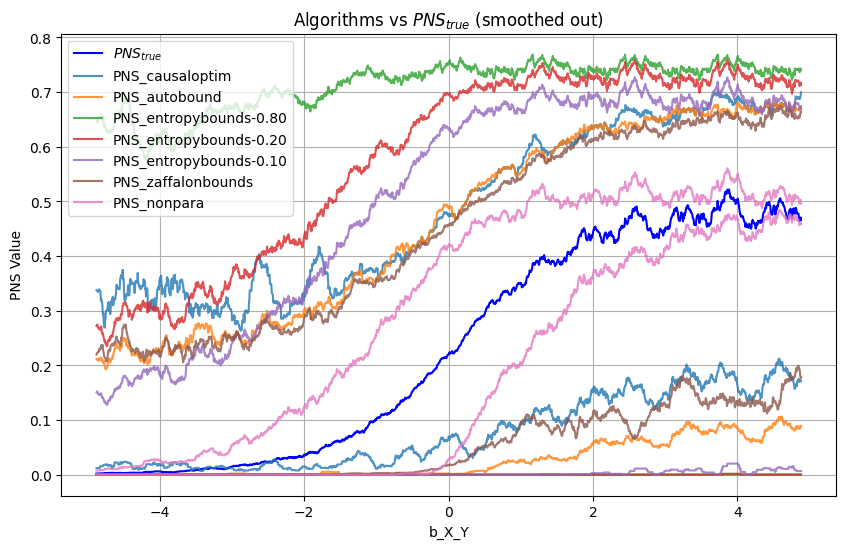

In [43]:
#PNS Evaluation
PlottingUtil.print_bound_statistics_table(results, binaryIV.get_algorithms('PNS'), 'PNS')
PlottingUtil.plot_smoothed_query_vs_bounds(results, 'PNS', binaryIV.get_algorithms('PNS'), 50)